In [25]:
import nltk
import random

In [26]:
from nltk.corpus import names

In [27]:
names.fileids()

['female.txt', 'male.txt']

In [28]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline

In [29]:
name_cfd = nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid)) 

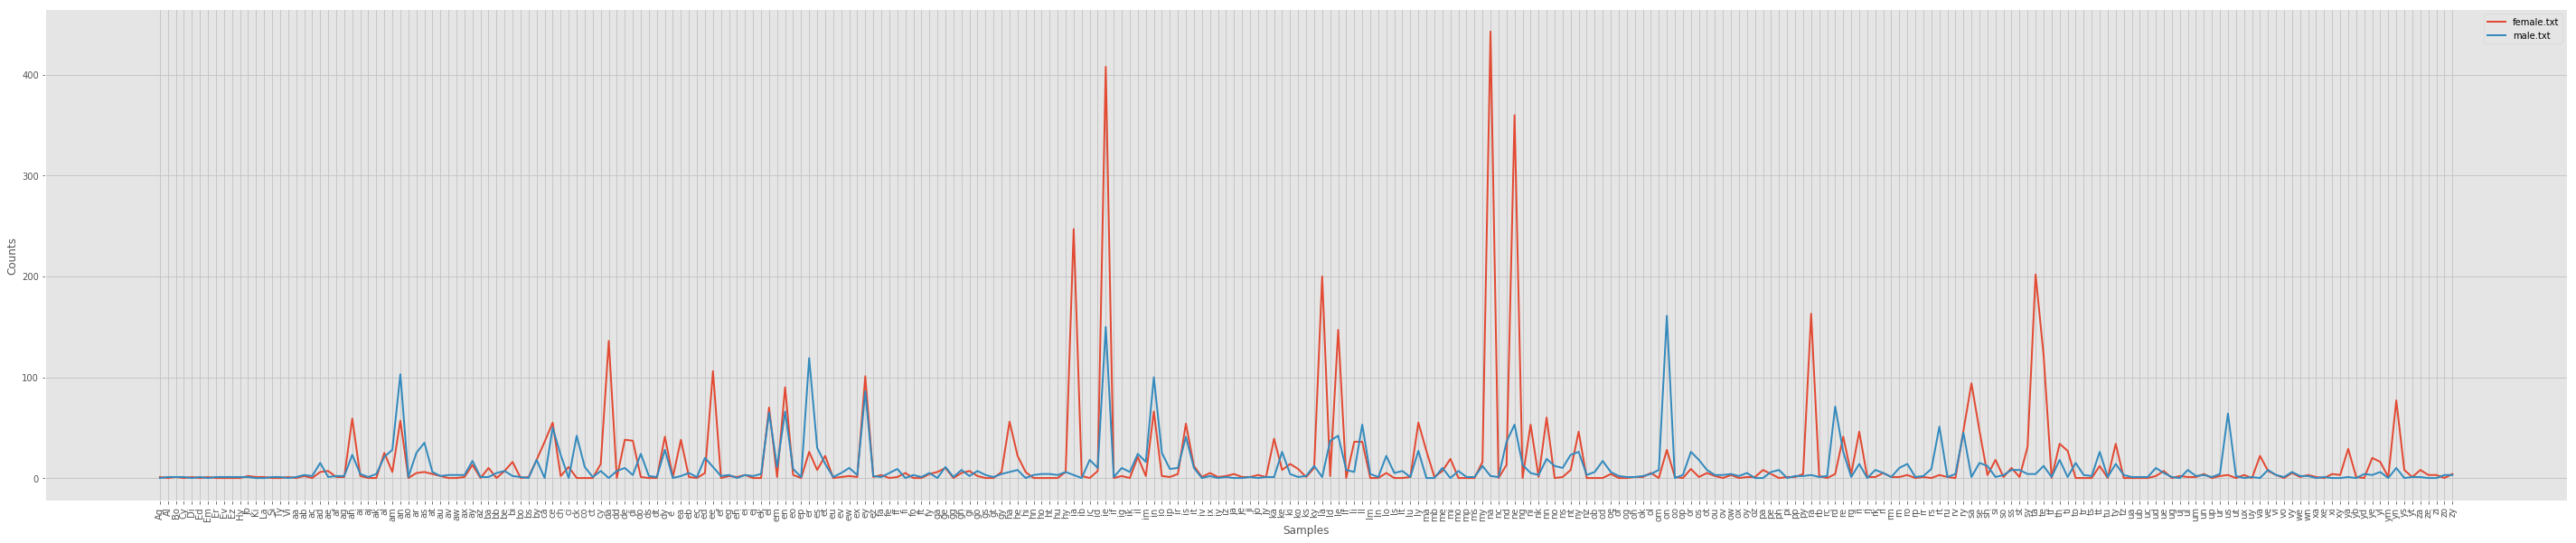

In [30]:
plt.figure(figsize=(50,10))
name_cfd.plot()

In [31]:
#a function to get last two alphabets of name
def name_features(name):
    return {"pair" : name[-2:]}

In [32]:
name_features("Tanvi")

{'pair': 'vi'}

In [33]:
name_list = [(name, "male") for name in names.words("male.txt")] + [(name,"female") for name in names.words('female.txt')]

In [34]:
name_list[:10]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male')]

In [35]:
random.shuffle(name_list)

In [36]:
name_list[:10]

[('Manya', 'female'),
 ('Rosanna', 'female'),
 ('Suzy', 'female'),
 ('Shayna', 'female'),
 ('Constanta', 'female'),
 ('Maryann', 'female'),
 ('Hertha', 'female'),
 ('Tom', 'male'),
 ('Missie', 'female'),
 ('Sibel', 'female')]

In [37]:
features = [(name_features(name),gender) for (name,gender) in name_list]

In [38]:
features[:10]

[({'pair': 'ya'}, 'female'),
 ({'pair': 'na'}, 'female'),
 ({'pair': 'zy'}, 'female'),
 ({'pair': 'na'}, 'female'),
 ({'pair': 'ta'}, 'female'),
 ({'pair': 'nn'}, 'female'),
 ({'pair': 'ha'}, 'female'),
 ({'pair': 'om'}, 'male'),
 ({'pair': 'ie'}, 'female'),
 ({'pair': 'el'}, 'female')]

In [39]:
#splitting list training and test
len(features)/2

3972.0

In [40]:
training_set = features[:3972]
testing_set = features[3972:]

In [41]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [42]:
male_names = names.words("male.txt")

In [18]:
female_names = names.words("female.txt")

In [19]:
#checking if this name exsist in list or not
"Carmello" in male_names

False

In [20]:
#if our model can classify
classifier.classify(name_features("Carmello"))

'male'

In [21]:
#if our model can classify
classifier.classify(name_features("Elle"))

'male'

In [23]:
#if our model can classify
classifier.classify(name_features("Andra"))

'female'

In [24]:
#testing is part of data
#it will compare last two pair of data
nltk.classify.accuracy(classifier,testing_set)

0.5445619335347432